# Plain-DNN for magnetic field 

## Navigating to the working directory containing the datasets and model

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
from platform import python_version
print(python_version())

3.7.12


## Checking the current working GPU

In [2]:
!nvidia-smi

Sun Mar 13 12:16:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 450.51.05    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:01:00.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |     29MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Loading the datasets and doing feature engineering 

In [5]:
# Loading data

import pickle
import os

# source_file_data_111 = '/content/drive/My Drive/part_C_all_1'
# os.chdir(source_file_data_111)

# with open('all_1_para', 'rb') as file_para:
#     para = pickle.load(file_para)
    
# with open('all_1_output_field', 'rb') as file_out:
#     output_field = pickle.load(file_out)
source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m'
os.chdir(source_file)

with open('para_cone_4m', 'rb') as file_para:
    para = pickle.load(file_para)
    
with open('output_field_cone_4m', 'rb') as file_out:
    output_field = pickle.load(file_out)


# with open('out_s_x_test_scaled_200k', 'rb') as filename:
#   out_x_scaled = pickle.load(filename)

# with open('out_s_y_test_scaled_200k', 'rb') as filename:
#   out_y_scaled = pickle.load(filename)

In [4]:
len(output_field)

4000000

## Cleaning data

In [6]:
# cleaning data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle

random.seed(123)

para_np = np.array(para)
output_field_np = np.array(output_field)

index = 0

q1, q3 = np.percentile(output_field_np[:, index], [25, 75])

upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

mask = (output_field_np[:, index] > lower)*(output_field_np[:, index] < upper)

mask_index = np.where(mask)[0]

clean_0 = output_field_np[:, index][mask]

para_0 = para_np[mask_index]

In [3]:
clean_0.shape

(3131632,)

/scratch/cvl/uqvngu19/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

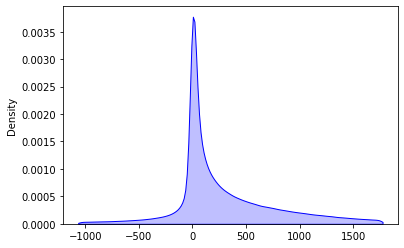

In [7]:
import seaborn as sns
sns.distplot(clean_0, kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')


(array([  35791.,   52163.,   97488., 1205321.,  766013.,  373569.,
         245965.,  167862.,  113129.,   74331.]),
 array([-1066.00109801,  -781.92699666,  -497.85289531,  -213.77879396,
           70.29530739,   354.36940874,   638.44351009,   922.51761144,
         1206.59171279,  1490.66581414,  1774.73991549]),
 <BarContainer object of 10 artists>)

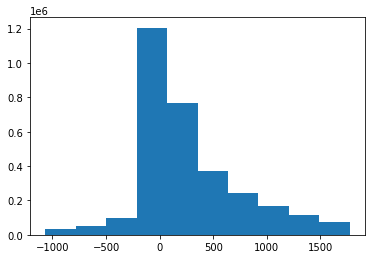

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(clean_0)
# plt.hist(output_field_np[:, 0])
#sns.distplot(output_field_np[:, 0], kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')


(array([387626., 374762., 360024., 344414., 325966., 307607., 288223.,
        268269., 247704., 227037.]),
 array([0.08726731, 0.21816684, 0.34906636, 0.47996589, 0.61086541,
        0.74176494, 0.87266447, 1.00356399, 1.13446352, 1.26536305,
        1.39626257]),
 <BarContainer object of 10 artists>)

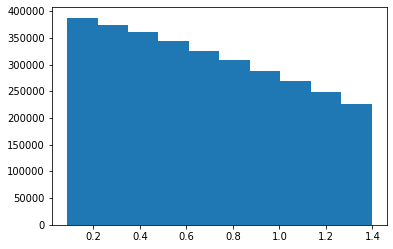

In [9]:
# mask = np.argwhere(output_field_np <= q3)
# mask.shape

from matplotlib import pyplot as plt

plt.hist(para_0[:,0])

#np.unique(output_field_np[:, 0], return_counts=True)


In [ ]:
output_field_np.shape

(2000000, 3)

## Feature engineering for clean data

In [10]:
# Feature engineering for clean datasets
# Feature engineering

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle

random.seed(123)

para_np = para_0 #np.array(para)
output_field_np = clean_0 #np.array(output_field)

#q1, q3 = np.percentile(output_field_np, [5, 95])

x_train, x_test, y_train, y_test = train_test_split(para_np, output_field_np, test_size=.10, shuffle=True)

x_sScaler = StandardScaler()
x_sScaler.fit(x_train)
s_x_train_scaled = x_sScaler.transform(x_train)
s_x_test_scaled = x_sScaler.transform(x_test)

y_sScaler = StandardScaler()
y_sScaler.fit(y_train.reshape(-1, 1))
s_y_train_scaled = y_sScaler.transform(y_train.reshape(-1, 1))
s_y_test_scaled = y_sScaler.transform(y_test.reshape(-1, 1))


# # Saving training, testing and scalers data


with open('re_s_x_train_scaled_ax', 'wb') as filename:
  pickle.dump(s_x_train_scaled, filename)

with open('re_s_y_train_scaled_ax', 'wb') as filename:
  pickle.dump(s_y_train_scaled, filename)

with open('re_s_x_test_scaled_ax', 'wb') as filename:
  pickle.dump(s_x_test_scaled, filename)

with open('re_s_y_test_scaled_ax', 'wb') as filename:
  pickle.dump(s_y_test_scaled, filename)

with open('re_x_sScaler_ax', 'wb') as filename:
  pickle.dump(x_sScaler, filename)

with open('re_y_sScaler_ax', 'wb') as filename:
  pickle.dump(y_sScaler, filename)

(array([[     0.,  93443., 179395., 154704., 129095., 105286.,  85360.,
          67187.,  50740.,  34790.],
        [     0.,  88082., 191583., 154492., 122934.,  99835.,  82710.,
          69851.,  60171.,  30342.],
        [ 67959.,  76735.,  93243., 109897., 122767., 135234., 148256.,
         145909.,      0.,      0.],
        [ 32881., 103687., 130850., 118074., 111040., 115935., 133341.,
         105383.,  48809.,      0.],
        [     0., 129574., 151187., 129451., 109870., 105804., 102477.,
         101927.,  69710.,      0.],
        [     0.,      0., 433005.,      0.,      0.,      0., 466995.,
              0.,      0.,      0.],
        [     0.,      0., 466995.,      0.,      0.,      0., 433005.,
              0.,      0.,      0.]]),
 array([-2.08572623, -1.63026724, -1.17480824, -0.71934925, -0.26389025,
         0.19156874,  0.64702774,  1.10248673,  1.55794573,  2.01340472,
         2.46886372]),
 <a list of 7 Lists of Patches objects>)

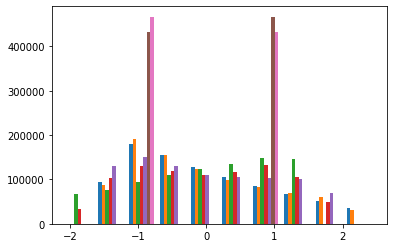

In [ ]:
plt.hist(s_x_train_scaled)

## Loading ready processed datasets

In [1]:
import pickle
import os

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m'

os.chdir(source_file)

with open('re_s_x_train_scaled_ax', 'rb') as filename:
  s_x_train_scaled = pickle.load(filename)

with open('re_s_y_train_scaled_ax', 'rb') as filename:
  s_y_train_scaled = pickle.load(filename)

with open('re_s_x_test_scaled_ax', 'rb') as filename:
  s_x_test_scaled = pickle.load(filename)

with open('re_s_y_test_scaled_ax', 'rb') as filename:
  s_y_test_scaled = pickle.load(filename)

with open('re_x_sScaler_ax', 'rb') as filename:
  x_sScaler = pickle.load(filename)

with open('re_y_sScaler_ax', 'rb') as filename:
  y_sScaler = pickle.load(filename)

# importing data for out of training intervals

# with open('out_s_x_test_scaled_200k', 'rb') as filename:
#   out_x_scaled = pickle.load(filename)

# with open('out_s_y_test_scaled_200k', 'rb') as filename:
#   out_y_scaled = pickle.load(filename)

In [ ]:
import numpy as np
min_ = np.min(s_y_train_scaled)
max_ = np.max(s_y_train_scaled)

out_min_ = np.min(out_y_scaled)
out_max_ = np.max(out_y_scaled)
print(f'Field interval for the training data is: [{min_}, {max_}]')
print(f'Field interval for the out of training intervals is: [{out_min_}, {out_max_}]')

Field interval for the training data is: [-23.610358434445427, 23.999540757658966]
Field interval for the out of training intervals is: [-2.3426246433144176, 2.2994854937939446]


In [ ]:
with open('out_para_200k', 'rb') as filename:
  out_para_scaled = pickle.load(filename)

In [ ]:
x_train.shape

(1372003, 9)

## PlainDNN model development

In [2]:
# Plain DNN model


import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Add, Concatenate, Activation


# Define a customised loss function

def loss_func(y_true, y_pred): 
    
    # Root mean square loss
    squared_difference = tf.square(y_true - y_pred)
    mean_square_loss = tf.reduce_mean(squared_difference, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss)
    
    return root_mean_square_loss 
 
def loss_func_with_weights(y_true, y_pred): 

    alpha = 3.0
    beta = 5.0
    sq = tf.square(y_true - y_pred)
    sq1 = tf.reshape(sq[:, 0], shape=(-1, 1)) 
    sq2 = tf.reshape(alpha*sq[:, 1], shape=(-1, 1))
    sq3 = tf.reshape(beta*sq[:, 2], shape=(-1, 1))
    sq4 = Concatenate(axis=-1)([sq1, sq2, sq3])
    mean_square_loss = tf.reduce_mean(sq4, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss+1e-20)
    
    return root_mean_square_loss 

class PlainDNNModel(tf.keras.Model):
    def __init__(self):
        
        super(PlainDNNModel, self).__init__()
        
        self.dense1_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense1_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense1_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)


        self.dense2_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense2_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense2_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)


        self.dense3_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_4 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_o = tf.keras.layers.Dense(1)

        
    def call(self, inputs):
        
        x_1 = self.dense1_1(inputs)
        x_1 = self.dense1_2(x_1)
        x_1 = self.dense1_3(x_1)

        
        x_2 = self.dense2_1(x_1)
        x_2 = self.dense2_2(x_2)
        x_2 = self.dense2_3(x_2)

        x_3 = self.dense3_1(x_2)
        x_3 = self.dense3_2(x_3)
        x_3 = self.dense3_3(x_3)
        x_3 = self.dense3_4(x_3)
        x_3 = self.dense3_o(x_3)
        
        
        return x_3
    


PlainModel = PlainDNNModel()  


opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999)

PlainModel.compile(optimizer=opt, loss='mse')

## Loading pre-trained model

In [4]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.layers import Add, Concatenate, Activation

#source_file = '/content/drive/My Drive/Data_and_model/Datasets_for_magfield'
# Define a customised loss function

def loss_func(y_true, y_pred): 
    
    # Root mean square loss
    squared_difference = tf.square(y_true - y_pred)
    mean_square_loss = tf.reduce_mean(squared_difference, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss + 1e-20)
    
    return root_mean_square_loss 
 
def loss_func_with_weights(y_true, y_pred): 

    alpha = 3.0
    beta = 5.0
    sq = tf.square(y_true - y_pred)
    sq1 = tf.reshape(sq[:, 0], shape=(-1, 1)) 
    sq2 = tf.reshape(alpha*sq[:, 1], shape=(-1, 1))
    sq3 = tf.reshape(beta*sq[:, 2], shape=(-1, 1))
    sq4 = Concatenate(axis=-1)([sq1, sq2, sq3])
    mean_square_loss = tf.reduce_mean(sq4, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss+1e-20)
    
    return root_mean_square_loss 

source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_ax')
if os.getcwd != source_file_model:
  os.chdir(source_file_model)

PlainModel = PlainDNNModel()  
PlainModel.load_weights('PlainDNN_400_796_clean') #PlainDNN_3001_noco


opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999 )
#Hmodel = tf.keras.models.load_model('HDNN_300', compile=False)

PlainModel.compile(optimizer=opt, loss=loss_func) # the loss_func is good enough we don't need the loss_func_with_weights


In [ ]:
os.getcwd()

'/home/opc/vantai/Datasets_for_magfield/re_HDNNmodel'

In [ ]:
decay_steps = 40
step = [10, 100, 200, 300]
decay_rate = 0.5

for step in step:
  print(decay_rate**(step/decay_steps))

0.8408964152537145
0.1767766952966369
0.03125
0.005524271728019903


In [ ]:
y_train.shape

(900000,)

## Model training

In [13]:
import pickle
import time
import os
from datetime import datetime
%load_ext tensorboard

now = datetime.now()
#os.mkdir('re_HDNNmodel_IQR_ax')

source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_ax')
if os.getcwd != source_file_model:
  os.chdir(source_file_model)



filepath = os.path.join(os.getcwd(), 'PlainDNN_400_796_clean')

modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss', 
                                                     mode='min', verbose=1, save_best_only=True, save_weights_only=True)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=20, min_delta=0.00005)

new_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', verbose=1, patience=10, 
                                              factor=1/10, min_lr=1e-5)

path = "logs/fit/" + now.strftime("%Y/%m/%/d, %H/%M")

#tensorboard = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

st = time.time()

history = PlainModel.fit(s_x_train_scaled, s_y_train_scaled, validation_split=.10, 
                     batch_size=512, epochs=400, callbacks=[earlystopping, modelcheckpoint, new_lr]) #[earlystopping, modelcheckpoint, new_lr]

used_time = time.time() - st

with open('p796_history_400_clean', 'wb') as filename:
  pickle.dump(history.history, filename)

with open('p796_used_time_400_clean', 'wb') as filename:
  pickle.dump(used_time, filename)

#oss: 0.1562 - val_loss: 0.1343

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/400
4955/4955 [==============================] - 39s 8ms/step - loss: 0.1152 - val_loss: 0.0297

Epoch 00001: val_loss improved from inf to 0.02970, saving model to /scratch/cvl/uqvngu19/Data_and_model/Cone_data_4m/re_HDNNmodel_IQR_ax/PlainDNN_400_796_clean
Epoch 2/400
4955/4955 [==============================] - 39s 8ms/step - loss: 0.0255 - val_loss: 0.0171

Epoch 00002: val_loss improved from 0.02970 to 0.01714, saving model to /scratch/cvl/uqvngu19/Data_and_model/Cone_data_4m/re_HDNNmodel_IQR_ax/PlainDNN_400_796_clean
Epoch 3/400
4955/4955 [==============================] - 39s 8ms/step - loss: 0.0187 - val_loss: 0.0129

Epoch 00003: val_loss improved from 0.01714 to 0.01293, saving model to /scratch/cvl/uqvngu19/Data_and_model/Cone_data_4m/re_HDNNmodel_IQR_ax/PlainDNN_400_796_clean
Epoch 4/400
4955/4955 [==============================] - 39s 8ms/step - loss: 0.0158 - val_loss: 0.0198


## History plotting

Text(0, 0.5, 'Errors')

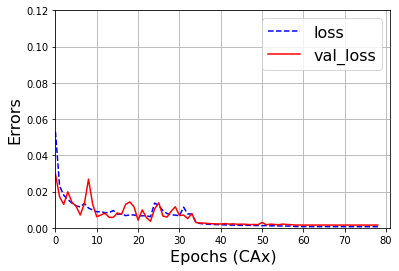

In [8]:
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m'
source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_ax')

if os.getcwd() != source_file_model:
  os.chdir(source_file_model)


with open('p796_history_400_clean', 'rb') as filename:
  hist1 = pickle.load(filename)

pdhist1 = pd.DataFrame(hist1)
#pdhist2 = pd.DataFrame(hist2)


#pdhist = pd.concat([pdhist1, pdhist2], axis=0, ignore_index_=True)


pdhist1['loss'].plot(linestyle='--', c='b')
pdhist1['val_loss'].plot(c='r')

plt.legend(loc='upper right', fontsize=16)
plt.grid()
plt.xlim(0, 81)
plt.ylim(0, 0.12)

plt.xlabel('Epochs (CAx)', fontsize=16)
plt.ylabel('Errors', fontsize=16)

#plt.text(170, .05, r"$\hat\alpha = 1.0,$",fontsize=12)
#plt.text(170, .04, r"$\hat\beta = 1.0$",fontsize=12)

#plt.text(310, .05, r"$\hat\alpha = 1.8,$",fontsize=12)
#plt.text(310, .04, r"$\hat\beta = 2.5$",fontsize=12)

#plt.text(410, .05, r"$\hat\alpha = 3.0,$",fontsize=12)
#plt.text(410, .04, r"$\hat\beta = 5.0$",fontsize=12)

#plt.vlines(300, ymin=0, ymax=.12, linestyles='dotted')
#plt.vlines(400, ymin=0, ymax=.12, linestyles='dotted')

In [ ]:
PlainModel.summary()

Model: "plain_dnn_model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            multiple                  7960      
_________________________________________________________________
dense_111 (Dense)            multiple                  634412    
_________________________________________________________________
dense_112 (Dense)            multiple                  634412    
_________________________________________________________________
dense_113 (Dense)            multiple                  634412    
_________________________________________________________________
dense_114 (Dense)            multiple                  634412    
_________________________________________________________________
dense_115 (Dense)            multiple                  634412    
_________________________________________________________________
dense_116 (Dense)            multiple           

## Model testing

In [9]:
# Predicting the results
s_y_predicted_scaled = PlainModel.predict(s_x_test_scaled)

# Predicting the results
#y_predicted = PlainModel.predict(x_test)

In [ ]:
out_y_predicted_scaled = PlainModel.predict(out_x_scaled)


In [10]:
# Testing the model
from sklearn.metrics import r2_score, mean_squared_error
r2_score(s_y_test_scaled, s_y_predicted_scaled)

#r2_score(s_y_test_scaled[:, 0], s_y_predicted_scaled[:, 0])

0.9987139270961943

In [15]:
import scipy.stats as ss


ss.pearsonr(np.squeeze(s_y_test_scaled), np.squeeze(s_y_predicted_scaled))

(0.999356773592457, 0.0)

In [11]:
y_pred = y_sScaler.inverse_transform(s_y_predicted_scaled).astype(np.float32)
y_test = y_sScaler.inverse_transform(s_y_test_scaled).astype(np.float32)


In [18]:
print(y_pred[10:20])
print(y_test[10:20])

[[ 978.6064  ]
 [  46.904236]
 [ 558.92847 ]
 [ -87.53163 ]
 [ -37.386612]
 [-153.84938 ]
 [1634.0448  ]
 [  68.1705  ]
 [1449.1688  ]
 [1041.5322  ]]
[[ 973.6188  ]
 [  48.38712 ]
 [ 560.4842  ]
 [ -94.71978 ]
 [ -37.62795 ]
 [-192.85011 ]
 [1605.9575  ]
 [  68.992096]
 [1445.775   ]
 [1037.4186  ]]


In [12]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np 

np.sqrt(mean_squared_error(y_test, y_pred))

16.80501

In [13]:
16.81/np.subtract(*np.percentile(y_test, [5, 95]))

-0.01085151360611378

In [14]:
np.subtract(*np.percentile(y_test, [5, 95]))

-1549.092652893066

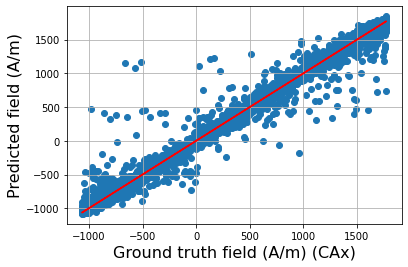

In [19]:
import matplotlib.pyplot as plt 

y_pred = y_sScaler.inverse_transform(s_y_predicted_scaled)
a, b = np.polyfit(np.squeeze(y_test), np.squeeze(y_pred), 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, a*y_test+b, color='r')
plt.xlabel('Ground truth field (A/m) (CAx)', fontsize=16)
plt.ylabel('Predicted field (A/m)', fontsize=16)
plt.grid('on')

In [ ]:
with open('out_para_cone_dataset', 'rb') as filename:
  out_x_scaled = pickle.load(filename)

with open('out_H_cone_dataset', 'rb') as filename:
  out_y_scaled = pickle.load(filename)

In [ ]:
x = x_sScaler.transform(out_x_scaled)
y = y_sScaler.transform(np.array(out_y_scaled)[:, 2].reshape(-1, 1))

In [1]:
np.array(out_x_scaled).shape

NameError: name 'np' is not defined

In [20]:
y_pred - y_test

array([[-1.2627349 ],
       [ 7.484314  ],
       [ 2.5948982 ],
       ...,
       [ 4.2545166 ],
       [ 0.5329437 ],
       [ 0.35831833]], dtype=float32)

mean: 0.27032527327537537, std: 1.05060875415802


/scratch/cvl/uqvngu19/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


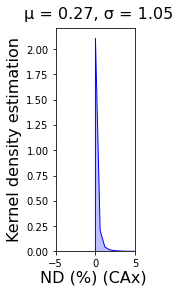

In [24]:
# Plotting pairs
# Not normalized
import seaborn as sns
index_ = 0

#vmin = np.min(s_y_test_scaled[:, index_])
#vmax = np.max(s_y_test_scaled[:, index_])
cmap = 'YlGnBu'
 # 0 for axial, 1 for azimuthal and 2 for radial components

height = [0.00148, 0.788, 0.00395]
low = [-0.000227, -0.12, -0.000588]
plt.figure(figsize=(10, 14))

interq_955 = np.subtract(*np.percentile(y_test, [95, 5]))
errors = abs(y_pred - y_test)*100/interq_955


# errors = (s_y_predicted_scaled[:, index_+1].reshape(400000,-1)-s_y_test_scaled[:, index_+1].reshape(400000,-1))*100/(
#     np.max(s_y_test_scaled[:, index_+1]) - np.min(s_y_test_scaled[:, index_+1]))



plt.subplot(342)
mean = np.mean(errors)
std = np.std(errors)

print('mean: {}, std: {}'.format(mean, std))

sns.distplot(errors, kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')
#sns.kdeplot(data=errors, fill=True)
plt.xlim(-5, 5)
plt.text(-7, -0.3, 'ND (%) (CAx)', fontsize=16)
#plt.text(-20, 1.6*low[index_+1], 'j) Azimuthal component', fontsize=12)
# #plt.xlabel('b) Azimuthal component', fontsize=12)
plt.ylabel('Kernel density estimation', fontsize=16)
plt.text(-9, 2.3, '\u03BC = {:2.2}, \u03C3 = {:0.3}'.format(mean, std), fontsize=16) # height index_ .2 for axial; = 6.5 for azimuthal and .42 for radial
# #plt.tight_layout(rect=(0., 0., 1, 1))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1., hspace=None)








